In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from time import time
from sklearn.cluster import SpectralClustering
from scipy.sparse.linalg import eigsh as sparse_eigsh

# Spectral Clustering of the co-authorship graph

In this notebook, we will attempt to perform spectral clustering on the co-authorship graph.

In [2]:
# Load the graph    
G = nx.read_edgelist('../Data/coauthorship.edgelist', delimiter=' ', nodetype=int)

### Optimal number of cluster

We look for the largest eigengap in the eigenvalues of the laplacian (at a reasonably small index to avoid a very large number of clusters). To do this, we obtain the $k$ smallest eigenvalues of the laplacian $L$ using [`scipy.sparse.linalg.eigsh`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html) for partial diagonalization of sparse hermitian matrices (we could not even store the entire laplacian with .

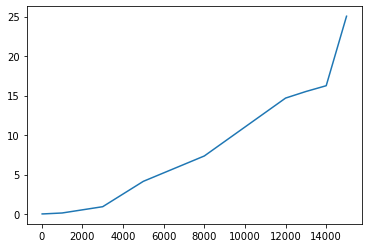

In [109]:
# How does the thing even scales ?

ln = [20, 100, 1000, 3000, 5000, 8000, 12000, 13000, 14000, 15000]
times = []

for n in ln:
    
    t0 = time()
    subnodes = [k for i,k in enumerate(G) if i < n]
    subG = G.subgraph(subnodes)
    
    subL = nx.laplacian_matrix(subG).astype(float)
    subeigvals, subeigvecs = sparse_eigsh(subL, k = 10, which = 'SM')
    subeigvals = np.real(subeigvals)
    times.append(time() - t0)

plt.plot(ln, times)

In [126]:
G.number_of_nodes()

217801

In [128]:
15**2

225

1151.4749994277954


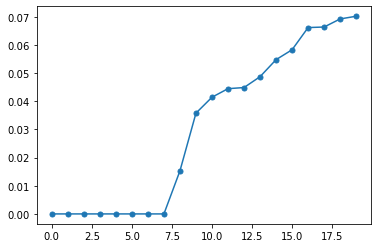

In [130]:
t0 = time()
subnodes = [k for i,k in enumerate(G) if i < 40000]
subG = G.subgraph(subnodes)
subL = nx.laplacian_matrix(subG).astype(float)
subeigvals, subeigvecs = sparse_eigsh(subL, k = 20, tol = 1e-5, which = 'SM')
subeigvals = np.real(subeigvals)
plt.plot(subeigvals, '.-', ms = 10)
print(time() - t0)

In [3]:
subnodes = [k for i,k in enumerate(G) if i < 40000]
subG = G.subgraph(subnodes)

In [7]:
for x in nx.connected_components(subG):
    print(len(x))

39891
8
14
29
18
11
22
7


In [136]:
subeigvals

array([-1.30210553e-12, -7.47279638e-13, -3.07086437e-13, -1.41384355e-13,
       -2.13879684e-14,  2.62182671e-14,  2.06795390e-13,  3.54627065e-13,
        1.52830158e-02,  3.57795404e-02,  4.14315992e-02,  4.44664022e-02,
        4.48669352e-02,  4.87200632e-02,  5.47682218e-02,  5.82850535e-02,
        6.61660613e-02,  6.63541068e-02,  6.92297062e-02,  7.01834019e-02])

In [135]:
25 / 3

8.333333333333334

In [132]:
1151 / 60

19.183333333333334

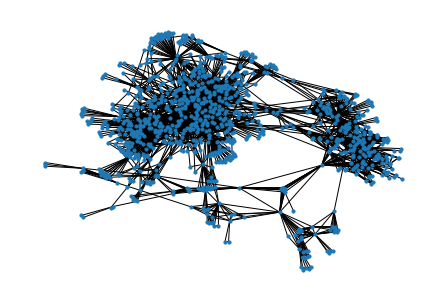

In [60]:
nx.draw(subG, node_size = 10)

In [ ]:
subL = nx.laplacian_matrix(subG).astype(float)
subeigvals, subeigvecs = sparse_eigsh(subL, k = 20, which = 'SM')
subeigvals = np.real(subeigvals)

In [ ]:
plt.plot(subeigvals, '.-', ms = 10)

In [23]:
L = nx.laplacian_matrix(G).astype(float)

In [24]:
eigvals, eigvecs = sparse_eigsh(L, k = 5, which = 'SM')

KeyboardInterrupt: 